In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math

In [3]:
train_df = pd.read_csv("train_dt.csv")
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [4]:
features_df = pd.read_csv("features_dt.csv")
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [5]:
stores_df = pd.read_csv("stores.csv")
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


# Data Cleaning and Exploration

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [7]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [8]:
train_df.dropna(how='any')

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [9]:
train_df.drop_duplicates()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


## Insights regarding Aggregate Sales by Store / Department

In [10]:
train_store_df = pd.merge(train_df, stores_df, on="Store", how='right')
train_store_df['Store'].nunique()

45

In [25]:
train_store_df = pd.merge(train_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
train_store_df['Date'] = pd.to_datetime(train_store_df['Date'])
train_store_df['Month'] = train_store_df['Date'].dt.month
train_store_df.groupby('Month')['Weekly_Sales'].mean().sort_values(ascending=False)
train_store_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,9
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,10
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,10
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,10


In [12]:
store_monthly_sales = (train_store_df
                       .groupby(['Month','Store'], as_index=False)[ 'Weekly_Sales']
                       .mean()
                       .rename(columns={'Weekly_Sales': 'Avg_Weekly_Sales'})
                      )

store_monthly_sales['Monthly_Avg_Sales_Rank'] = (store_monthly_sales
                                             .groupby('Month')['Avg_Weekly_Sales']
                                             .rank(method='dense', ascending=False))

monthly_top_stores = (store_monthly_sales
                      .sort_values(['Month', 'Monthly_Avg_Sales_Rank'])
                      .groupby('Month', as_index=False)
                      .first())

monthly_top_stores.sort_values('Avg_Weekly_Sales', ascending=False).drop('Monthly_Avg_Sales_Rank', axis=1).reset_index(drop=True).rename(lambda x: x + 1)

,Month,Store,Avg_Weekly_Sales
1,12,20,36707.990302
2,11,20,33017.494572
3,2,20,30464.008370
4,6,20,29803.121209
5,4,14,29467.913047
6,5,14,29231.265922
7,8,4,29082.862586
8,7,20,28857.317280
9,10,4,28723.672097
10,3,14,28363.344793


In [13]:
# Average Weekly Sales by Store and Month
store_monthly_sales = (train_store_df
                       .groupby(['Month','Store'], as_index=False)
                       .agg(
                           Avg_Weekly_Sales_IsHoliday = ('Weekly_Sales', lambda x: x[train_store_df.loc[x.index, 'IsHoliday']].mean()),
                           Avg_Weekly_Sales_NotHoliday = ('Weekly_Sales', lambda x: x[~train_store_df.loc[x.index, 'IsHoliday']].mean())
                         )
                      )

store_monthly_sales['Monthly_Avg_Sales_Rank'] = (store_monthly_sales
                                             .groupby('Month')['Avg_Weekly_Sales_NotHoliday']
                                             .rank(method='dense', ascending=False))

monthly_top_stores = (store_monthly_sales
                      .sort_values(['Month', 'Monthly_Avg_Sales_Rank'])
                      .groupby('Month', as_index=False)
                      .first())

monthly_top_stores.sort_values('Avg_Weekly_Sales_NotHoliday', ascending=False).drop('Monthly_Avg_Sales_Rank', axis=1).reset_index(drop=True).rename(lambda x: x + 1)

,Month,Store,Avg_Weekly_Sales_IsHoliday,Avg_Weekly_Sales_NotHoliday
1,12,20,26321.799932,39308.991664
2,11,20,39707.411736,30771.927972
3,2,20,31404.973704,30150.836549
4,6,20,NaN,29803.121209
5,4,14,NaN,29467.913047
6,5,14,NaN,29231.265922
7,8,4,NaN,29082.862586
8,7,20,NaN,28857.317280
9,10,4,NaN,28723.672097
10,3,14,NaN,28363.344793


### Having segmented sales by whether the months had holidays or not, the top 3 months with highest average sales per day appeared to be December, November, and February, which were also holiday seasons. Among them, November and February observed remarkably more sales during holidays than they did on normal days, while the reverse happened in December; in fact, December witnessed the least sales compared to months that had holidays. September, the other month that had holidays, ranked the second lowest, not to mention gained more slightly more sales on non-holiday days.
### Store 20 recorded the highest mean daily sales during the top 3 months above.

In [14]:
department_monthly_sales = (train_store_df
                       .groupby(['Month','Dept'], as_index=False)[ 'Weekly_Sales']
                       .mean()
                       .rename(columns={'Weekly_Sales': 'Avg_Weekly_Sales'})
                      )

department_monthly_sales['Monthly_Avg_Sales_Rank'] = (department_monthly_sales
                                             .groupby('Month')['Avg_Weekly_Sales']
                                             .rank(method='dense', ascending=False))
                       
monthly_top_departments = (department_monthly_sales
                      .sort_values(['Month', 'Monthly_Avg_Sales_Rank'])
                      .groupby('Month', as_index=False)
                      .first())

monthly_top_departments.sort_values('Avg_Weekly_Sales', ascending=False).drop('Monthly_Avg_Sales_Rank', axis=1).reset_index(drop=True).rename(lambda x: x + 1)

,Month,Dept,Avg_Weekly_Sales
1,11,72,99506.898521
2,12,92,81465.246444
3,2,92,77970.267741
4,1,92,77310.529778
5,6,95,76793.174205
6,10,92,76659.266718
7,7,95,75829.782254
8,9,92,74754.274838
9,8,95,74735.687641
10,3,92,74313.096205


In [15]:
department_monthly_sales = (train_store_df
                       .groupby(['Month','Dept'], as_index=False)
                       .agg(
                           Avg_Weekly_Sales_IsHoliday = ('Weekly_Sales', lambda x: x[train_store_df.loc[x.index, 'IsHoliday']].mean()),
                           Avg_Weekly_Sales_NotHoliday = ('Weekly_Sales', lambda x: x[~train_store_df.loc[x.index, 'IsHoliday']].mean())
                         )
                      )

department_monthly_sales['Monthly_Avg_Sales_Rank'] = (department_monthly_sales
                                             .groupby('Month')['Avg_Weekly_Sales_NotHoliday']
                                             .rank(method='dense', ascending=False))
                       
monthly_top_departments = (department_monthly_sales
                      .sort_values(['Month', 'Monthly_Avg_Sales_Rank'])
                      .groupby('Month', as_index=False)
                      .first())

monthly_top_departments.sort_values('Avg_Weekly_Sales_NotHoliday', ascending=False).drop('Monthly_Avg_Sales_Rank', axis=1).reset_index(drop=True).rename(lambda x: x + 1)

,Month,Dept,Avg_Weekly_Sales_IsHoliday,Avg_Weekly_Sales_NotHoliday
1,12,92,61541.679667,86446.138139
2,11,92,92374.996333,83374.473074
3,1,92,NaN,77310.529778
4,2,92,80686.785926,77064.761679
5,6,95,NaN,76793.174205
6,10,92,NaN,76659.266718
7,7,95,NaN,75829.782254
8,8,95,NaN,74735.687641
9,3,92,NaN,74313.096205
10,9,92,81112.445630,72846.823600


### Having segmented sales by whether the months had holidays or not, the top 3 months with highest average sales per day appeared to be December, November, and January. There were no holidays in January, yet for holiday seasons like December and November, there was a conflicting trend - December observed significantly more sales on non-holiday days while the opposite happened in November. Other months that had holidays - February and September - followed the same pattern like in November, despite ranking lower down the list. 
### Department 92 recorded the highest mean daily sales within each of the top 3 months mentioned.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\linhk\AppData\Local\Temp\ipykernel_416\858733530.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train_store_df, x='Month', y='Weekly_Sales', ci=None)


Text(0.5, 1.0, 'Average Weekly Sales by Month')

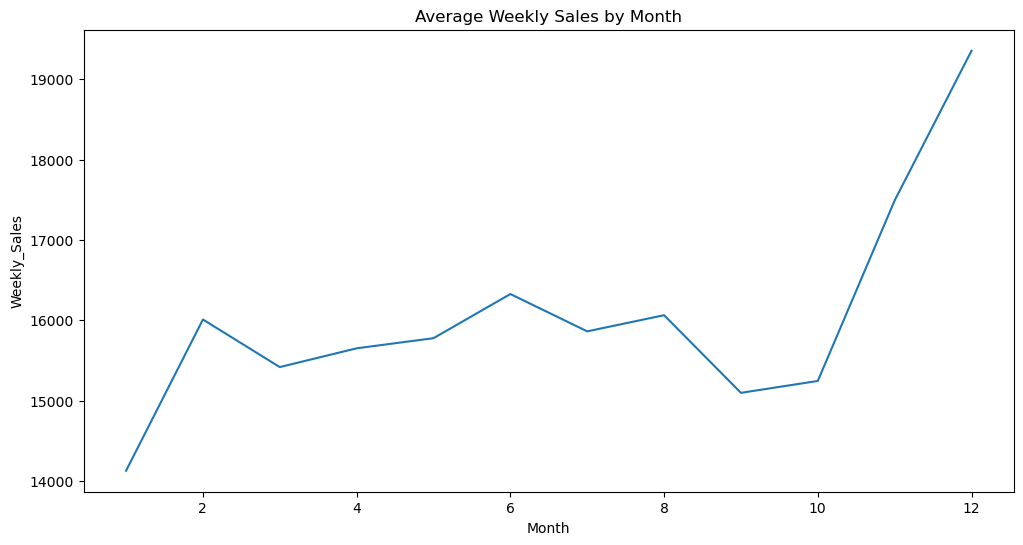

In [17]:
# Visualizations (?)
plt.figure(figsize=(12,6))
sns.lineplot(data=train_store_df, x='Month', y='Weekly_Sales', ci=None)
plt.title('Average Weekly Sales by Month')

In [46]:
viz_df = pd.merge(train_store_df, stores_df, on=['Store'], how='left')

Text(0.5, 1.0, 'Correlation Heatmap (Weekly_Sales vs features)')

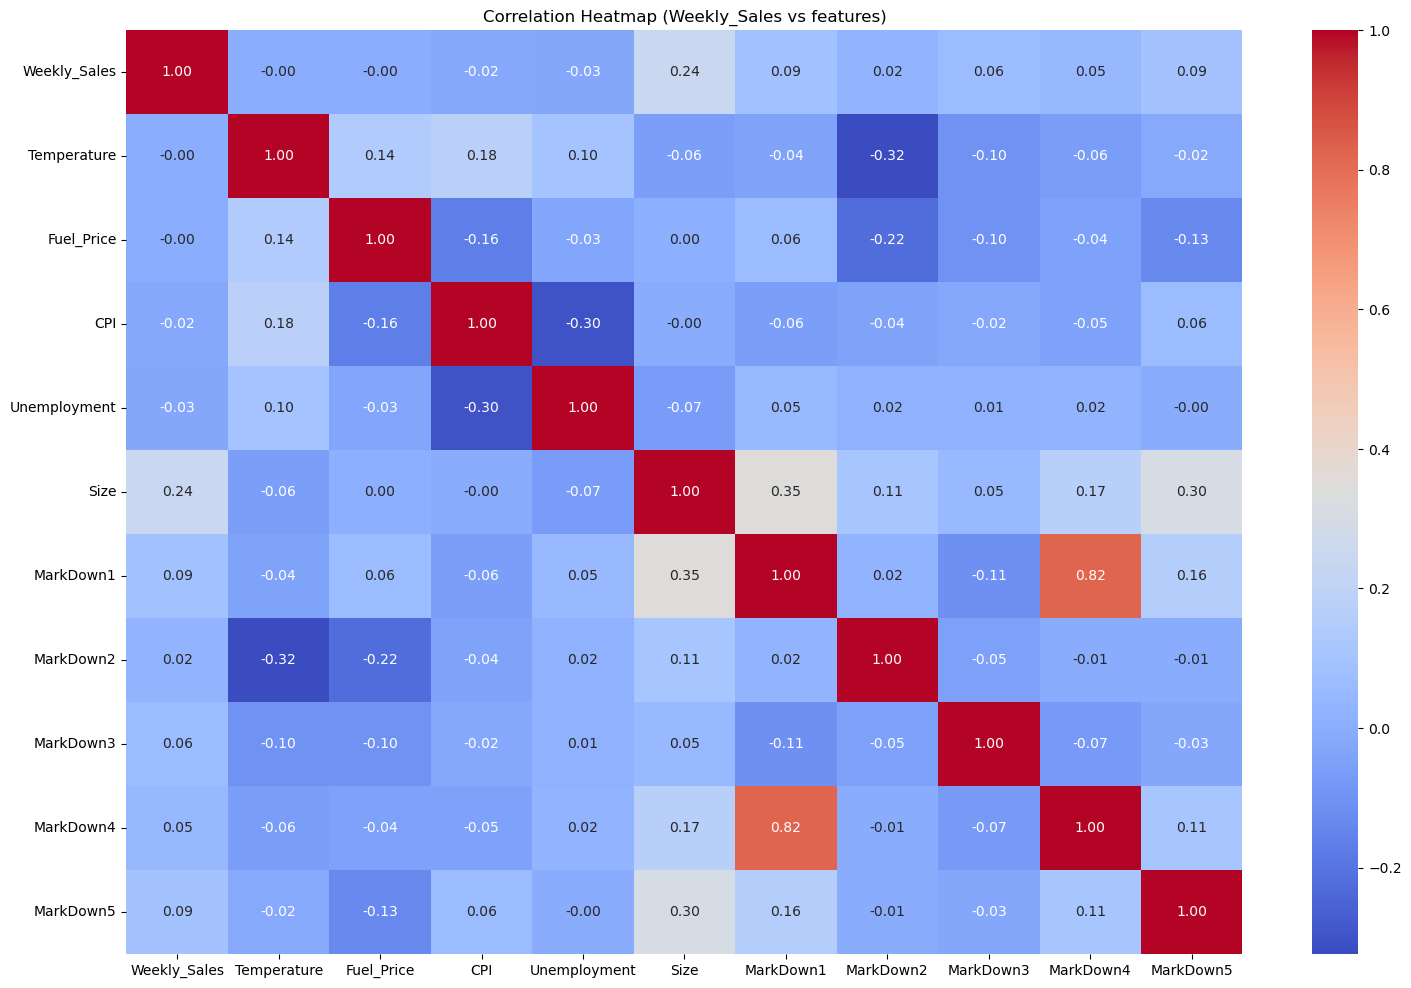

In [ ]:
# Correlation Heatmap (use merged dataframe that contains Weekly_Sales)
feature_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

plt.figure(figsize=(18,12))
sns.heatmap(viz_df[feature_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Weekly_Sales vs features)')

## Forecasting

In [20]:
%pip install xgboost

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from xgboost import XGBRegressor

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 2.5 MB/s eta 0:00:29
    --------------------------------------- 1.3/72.0 MB 3.3 MB/s eta 0:00:22
   -- ------------------------------------- 3.9/72.0 MB 6.7 MB/s eta 0:00:11
   ---- ----------------------------------- 7.9/72.0 MB 9.8 MB/s eta 0:00:07
   ------- -------------------------------- 12.8/72.0 MB 12.8 MB/s eta 0:00:05
   ---------- ----------------------------- 18.6/72.0 MB 15.3 MB/s eta 0:00:04
   ------------ --------------------------- 23.1/72.0 MB 16.8 MB/s eta 0:00:03
   --------------- ------------------------ 28.6/72.0 MB 17.4 MB/s eta 0:00:03
   --------------------- ------------------ 38.8/72.0 MB 20.9 MB/s eta 0:00:02
   --------------------------- ------------ 50.3/72.0 MB 24.2 MB/s eta 0:00:01
   --------------------------------- ------ 60.6/72.0 MB 26.4 MB/s eta 0:00:01

In [47]:
# Date feature extraction
viz_df['Date'] = pd.to_datetime(viz_df['Date'])
viz_df['Month'] = viz_df['Date'].dt.month
viz_df['Year'] = viz_df['Date'].dt.year

In [48]:
# Data Preparation for Modeling
viz_df['MarkDown1'] = viz_df['MarkDown1'].fillna(0)
viz_df['MarkDown2'] = viz_df['MarkDown2'].fillna(0)
viz_df['MarkDown3'] = viz_df['MarkDown3'].fillna(0)
viz_df['MarkDown4'] = viz_df['MarkDown4'].fillna(0)
viz_df['MarkDown5'] = viz_df['MarkDown5'].fillna(0)

# One-hot encoding for categorical variables
categorical_cols = ['IsHoliday', 'Type']
viz_df = pd.get_dummies(viz_df, columns=categorical_cols, drop_first=True)

# Feature Scaling
standard_scaler = StandardScaler()
numerical_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
viz_df[numerical_cols] = standard_scaler.fit_transform(viz_df[numerical_cols])

# Split the data into training and testing sets
feature_cols = viz_df.columns.tolist()
feature_cols.remove('Weekly_Sales')
feature_cols.remove('Date')
x_train, x_test, y_train, y_test = train_test_split(viz_df[feature_cols], viz_df['Weekly_Sales'], test_size=0.2, random_state=42)

In [49]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=10, n_jobs=4)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Accuracy Score:", knn_model.score(x_test, y_test))

Mean Absolute Error (MAE): 6536.648800234836
Mean Squared Error (MSE): 145550114.0706401
Accuracy Score: 0.7208855026289847


Text(0.5, 0, 'Actual Weekly Sales')

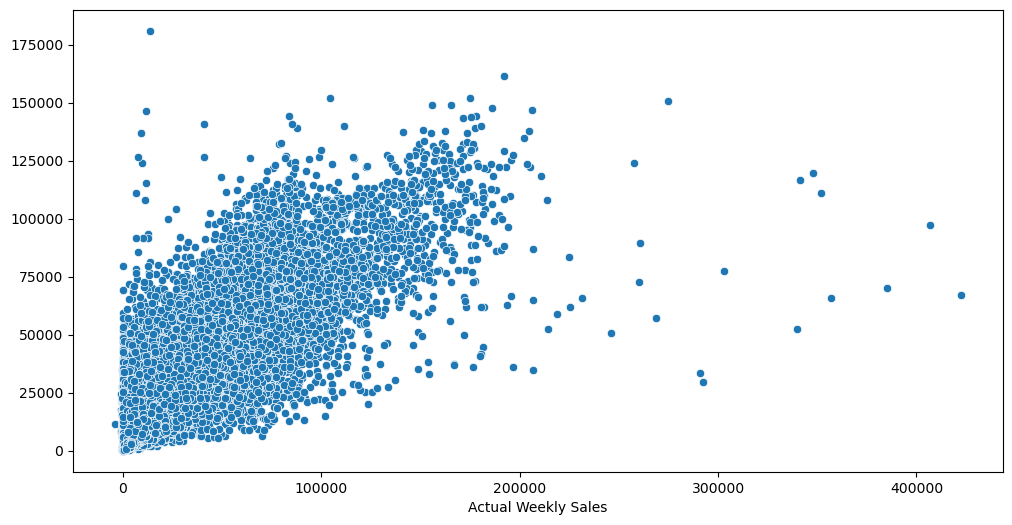

In [50]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Weekly Sales')

In [51]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state=1234)
decision_tree_regressor.fit(x_train, y_train)
y_pred = decision_tree_regressor.predict(x_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Accuracy Score:", decision_tree_regressor.score(x_test, y_test))

Mean Absolute Error (MAE): 2084.66136596532
Mean Squared Error (MSE): 30694482.209453262
Accuracy Score: 0.9411386584705997


In [52]:
rf_refressor = RandomForestRegressor(n_estimators=400, max_depth=15, random_state=1234, n_jobs=4)
rf_refressor.fit(x_train, y_train)
y_pred = rf_refressor.predict(x_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Accuracy Score:", rf_refressor.score(x_test, y_test))

Mean Absolute Error (MAE): 2085.085603226082
Mean Squared Error (MSE): 24112023.161966205
Accuracy Score: 0.9537615255857224


Mean Absolute Error (MAE): 1674.8681070051425
Mean Squared Error (MSE): 13768692.718074564
Accuracy Score: 0.9735964360316737


Text(0.5, 0, 'Actual Weekly Sales')

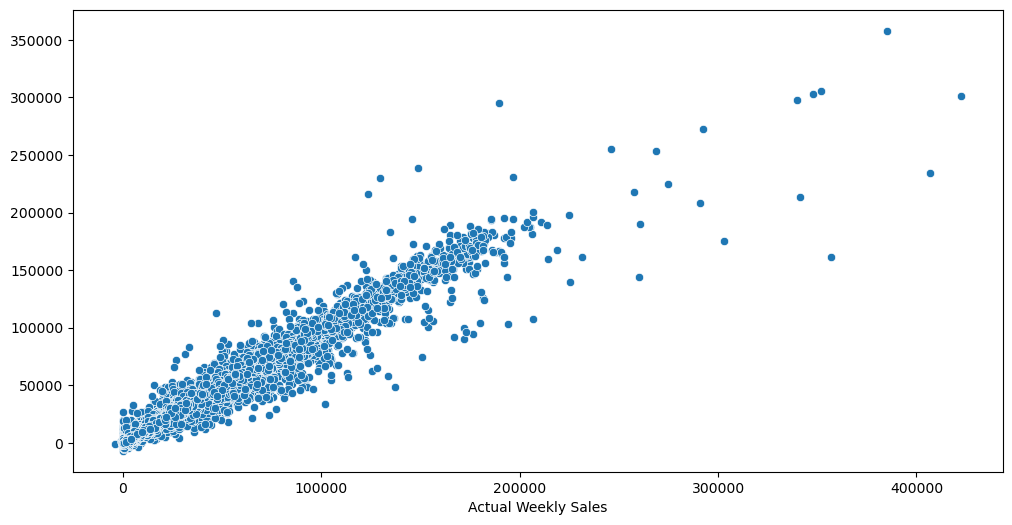

In [53]:
xgb_regressor = XGBRegressor(n_estimators=400, max_depth=10, learning_rate=0.1, random_state=1234, n_jobs=4)
xgb_regressor.fit(x_train, y_train)
y_pred = xgb_regressor.predict(x_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Accuracy Score:", xgb_regressor.score(x_test, y_test))

plt.figure(figsize=(12,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Weekly Sales')